In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv('Categorical.csv')
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [6]:
raw_data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [8]:
#cluster them by continent
data_mapped = raw_data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America': 0, 'Europe':1, 'Asia':2, 'Africa':3, 'South America':4, 'Oceania':5, 'Seven seas (open ocean)':6, 'Antarctica':7 })

In [10]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


In [27]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans()

In [28]:
clusters = kmeans.fit_predict(x)
clusters

array([3, 4, 0, 3, 1, 1, 1, 4, 5, 4, 2, 7, 2, 6, 3, 2, 1, 4, 0, 1, 0, 0,
       4, 1, 4, 3, 3, 1, 3, 1, 3, 3, 5, 5, 3, 4, 4, 0, 0, 1, 5, 4, 0, 0,
       0, 0, 2, 5, 0, 0, 3, 3, 3, 3, 4, 4, 1, 1, 0, 3, 1, 3, 0, 5, 0, 0,
       1, 1, 0, 1, 2, 5, 1, 1, 2, 0, 1, 4, 1, 0, 0, 0, 0, 0, 1, 3, 3, 3,
       2, 5, 4, 6, 3, 1, 3, 1, 4, 1, 4, 4, 6, 1, 4, 4, 1, 4, 1, 3, 1, 4,
       4, 4, 4, 0, 4, 4, 2, 3, 4, 1, 4, 4, 4, 0, 0, 3, 1, 4, 0, 1, 1, 1,
       4, 3, 0, 1, 1, 0, 6, 3, 2, 1, 0, 1, 4, 1, 4, 2, 0, 0, 3, 6, 0, 4,
       0, 2, 0, 2, 0, 3, 2, 1, 1, 4, 2, 2, 4, 4, 3, 2, 5, 4, 2, 2, 1, 3,
       4, 1, 5, 4, 2, 4, 1, 1, 0, 0, 4, 0, 0, 0, 4, 6, 6, 2, 0, 3, 1, 0,
       0, 3, 1, 0, 5, 1, 1, 1, 0, 3, 6, 4, 3, 0, 0, 4, 4, 4, 4, 2, 3, 0,
       4, 4, 0, 0, 1, 5, 3, 4, 1, 3, 5, 3, 3, 4, 2, 2, 2, 4, 0, 0, 0],
      dtype=int32)

In [29]:
clustered_data = data_mapped.copy()
clustered_data['Cluster'] = clusters
clustered_data

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,3
1,Afghanistan,66.004734,33.835231,2,4
2,Angola,17.537368,-12.293361,3,0
3,Anguilla,-63.064989,18.223959,0,3
4,Albania,20.049834,41.142450,1,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,2,4
238,South Africa,25.083901,-29.000341,3,0
239,Zambia,27.774759,-13.458242,3,0


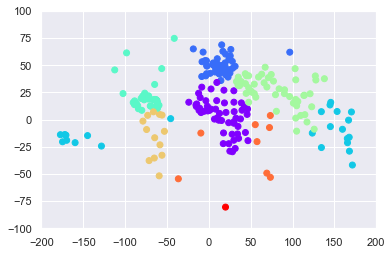

In [30]:
plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], c = clustered_data.Cluster, cmap = 'rainbow')
plt.xlim(-200, 200)
plt.ylim(-100, 100)
plt.show()